In [1]:
import os
import pandas as pd
output_dir = "output_dir_exampl1"
dat_train = pd.read_csv(os.path.join(output_dir, 'train_set.csv'))
dat_expl = pd.read_csv(os.path.join(output_dir, 'validation_set.csv'))

dat_train

,label,Age,Gender,Util_A,Util_B,Util_C,Util_D,Comorb_A,Comorb_B,Comorb_C,...,Comorb_E,Lab_A,Lab_B,Lab_C,Vital_A,Vital_B,Vital_C,Vital_D,Vital_E,Vital_F
0,0,86,MALE,P1,0,0.00,2.650278,0,0,0,...,0,72.0,4.1,136.0,100.0,18,99,65,126,25.7
1,0,51,MALE,P2,0,0.00,4.971111,0,0,0,...,0,67.0,5.0,122.0,73.0,17,97,46,100,24.9
2,0,23,FEMALE,P1,0,0.00,0.535278,0,0,0,...,0,1036.0,4.1,138.0,74.0,18,98,89,114,25.7
3,0,32,FEMALE,P2,0,4.13,4.400833,0,0,0,...,0,806.0,4.1,136.0,77.0,18,98,74,157,25.3
4,0,93,FEMALE,P3 and P4,0,2.94,5.539167,0,0,0,...,0,122.0,4.5,133.0,57.0,14,99,80,96,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0,47,MALE,P2,0,0.29,2.429722,0,0,0,...,0,83.0,4.2,136.0,101.0,18,98,75,144,23.9
13996,0,76,MALE,P1,0,0.00,3.205833,0,0,0,...,0,243.0,3.2,136.0,64.0,16,98,71,166,22.2
13997,0,48,FEMALE,P3 and P4,0,5.80,4.366111,0,0,0,...,0,107.0,3.6,134.0,101.0,18,100,74,195,28.3
13998,0,84,FEMALE,P1,0,5.00,2.454444,0,1,0,...,0,736.0,6.4,126.0,84.0,17,95,79,141,23.7


In [2]:
y_name = 'label'
from ShapleyVIC import model
model_object = model.models(
    x=dat_train.drop(columns=[y_name]), y=dat_train[y_name], 
    x_names_cat=['Gender', 'Util_A', 'Comorb_A', 'Comorb_B', 'Comorb_C', 'Comorb_D', 'Comorb_E'],
    outcome_type='ordinal', output_dir=output_dir
)
model_object.model_optim.summary()

Optimization terminated successfully.
         Current function value: 0.550442
         Iterations: 99
         Function evaluations: 105
         Gradient evaluations: 105


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  label   Log-Likelihood:                -7706.2
Model:                   OrderedModel   AIC:                         1.546e+04
Method:            Maximum Likelihood   BIC:                         1.563e+04
Date:                Mon, 01 Jan 2024                                         
Time:                        14:39:46                                         
No. Observations:               14000                                         
Df Residuals:                   13977                                         
Df Model:                          23                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0197      0.001     14.718      0.000       0.017       0.022
Gender_MALE         -0.0890      0.045     -1.965      0.049      -0.178      -0.000
Util_A_P2            0.0036      0.060      0.060      0.952      -0.114       0.122
Util_A_P3 and P4    -0.0232      0.070     -0.333      0.739      -0.160       0.113
Util_B               0.1361      0.009     15.579      0.000       0.119       0.153
Util_C              -0.0004      0.002     -0.141      0.888      -0.005       0.005
Util_D              -0.0769      0.014     -5.466      0.000      -0.105      -0.049
Comorb_A_1           1.5267      0.066     23.081      0.000       1.397       1.656
Comorb_B_1           0.0323      0.066      0.486      0.627      -0.098       0.163
Comorb_C_1           0.2021      0.135      1.496      0.135      -0.063       0.467
Comorb_D_1           0.0262      0.077      0.339      0.734      -0.125       0.177
Comorb_E_1          -0.1685      0.192     -0.879      0.379      -0.544       0.207
Lab_A                0.0004      0.000      4.092      0.000       0.000       0.001
Lab_B               -0.0070      0.033     -0.210      0.833      -0.072       0.058
Lab_C               -0.0067      0.005     -1.439      0.150      -0.016       0.002
Vital_A              0.0107      0.001      8.320      0.000       0.008       0.013
Vital_B             -0.0040      0.013     -0.317      0.751      -0.029       0.021
Vital_C             -0.0014      0.007     -0.201      0.841      -0.015       0.012
Vital_D              0.0007      0.002      0.398      0.691      -0.003       0.004
Vital_E             -0.0062      0.001     -6.743      0.000      -0.008      -0.004
Vital_F             -0.0244      0.006     -3.837      0.000      -0.037      -0.012
0/1                  1.2984      1.010      1.286      0.198      -0.680       3.277
1/2                  0.2982      0.024     12.522      0.000       0.252       0.345
====================================================================================
"""

In [3]:
u1, u2 = model_object.init_hyper_params()
(u1, u2)

Nearly optimal defined based on loss.



(0.5, 43.75)

Nearly optimal defined based on loss.



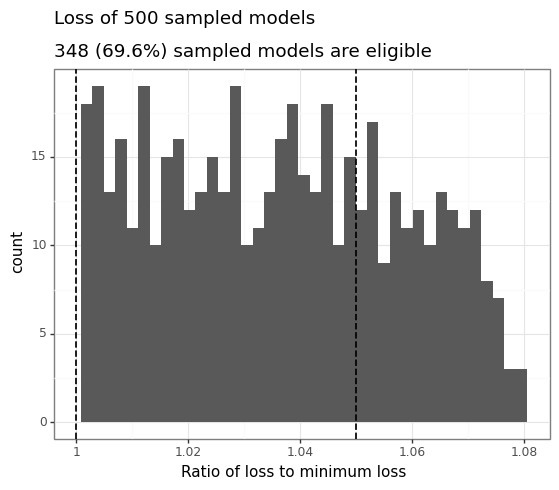

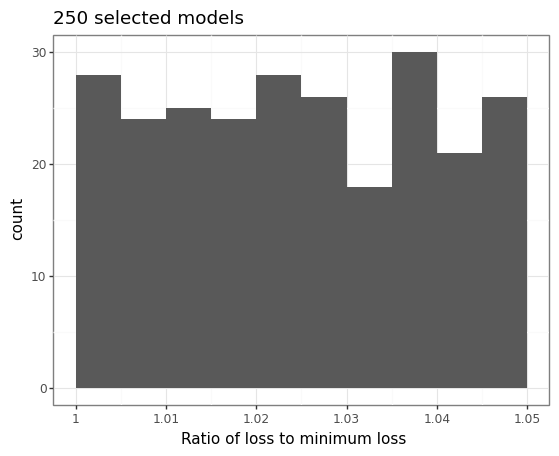

(<ggplot: (116133288006)>, <ggplot: (116133291558)>)

In [4]:
model_object.draw_models(u1=u1, u2=u2, m=500, n_final=250, random_state=1234)
model_object.models_plot

In [5]:
from ShapleyVIC import compute
m_svic = compute.compute_shapley_vic(
    model_obj=model_object, 
    x_expl=dat_expl.drop(columns=[y_name]), y_expl=dat_expl[y_name], 
    n_cores=20, # running on a Mac with 8 cores
    threshold=0.05
)

ShapleyVIC:   0%|          | 0/250 [00:00<?, ?it/s]

Using 20 cores in parallel computing.



[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 71.8min
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed: 715.5min

100%|██████████| 250/250 [18:18:42<00:00, 263.69s/it] 1098.7min finished


Program finished in 18.311642933999998 hours
